<a href="https://colab.research.google.com/github/annalisaalbert/Portfolio/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('breast_cancer.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [7]:
lb=LabelEncoder()
df.diagnosis = lb.fit_transform(df.diagnosis)

In [8]:
df.iloc[:, 1]=lb.fit_transform(df.iloc[:, 1].values)

In [9]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [10]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [11]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


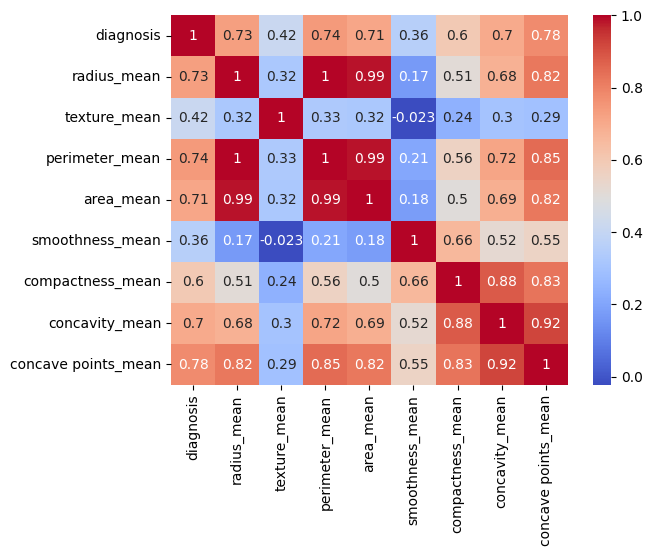

In [12]:
sns.heatmap(df.iloc[:, 1:10].corr(), annot=True, cmap='coolwarm')

plt.show()

In [13]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']

targeted_feature = 'diagnosis'

len(prediction_feature)

6

In [14]:
X = df[prediction_feature]
X

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
0,17.99,122.80,1001.0,0.2419,0.27760,0.14710
1,20.57,132.90,1326.0,0.1812,0.07864,0.07017
2,19.69,130.00,1203.0,0.2069,0.15990,0.12790
3,11.42,77.58,386.1,0.2597,0.28390,0.10520
4,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.13890
565,20.13,131.20,1261.0,0.1752,0.10340,0.09791
566,16.60,108.30,858.1,0.1590,0.10230,0.05302
567,20.60,140.10,1265.0,0.2397,0.27700,0.15200


In [15]:
y = df.diagnosis
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

print(X_train)

     radius_mean  perimeter_mean  area_mean  symmetry_mean  compactness_mean  \
274        17.93          115.20      998.9         0.1538           0.07027   
189        12.30           78.83      463.7         0.1667           0.07253   
158        12.06           76.84      448.6         0.1590           0.05241   
257        15.32          103.20      713.3         0.2398           0.22840   
486        14.64           94.21      666.0         0.1409           0.06698   
..           ...             ...        ...            ...               ...   
85         18.46          121.10     1075.0         0.2132           0.10530   
199        14.45           94.49      642.7         0.1950           0.12060   
156        17.68          117.40      963.7         0.1971           0.16650   
384        13.28           85.79      541.8         0.1617           0.08575   
456        11.63           74.87      415.1         0.1799           0.08574   

     concave points_mean  
274         


**Perform Feature Standerd Scalling**

* Standardize features by removing the mean and scaling to unit varianceThe standard score of a sample x is calculated as



In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

models_list = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5)
}

df_prediction = []
confusion_matrixs = []
df_prediction_cols = ['model_name', 'score', 'accuracy_score', 'accuracy_percentage']

def model_building(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    predictions = model.predict(X_test)
    accuracy = (predictions == y_test).mean()
    return score, accuracy, predictions

for name, model in models_list.items():
    score, accuracy, predictions = model_building(model, X_train, X_test, y_train, y_test)

    print("\n\nClassification Report of '" + str(name) + "'\n")
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    confusion_matrixs.append(confusion_matrix(y_test, predictions))


df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'RandomForestClassifier'

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       115
           1       0.90      0.85      0.87        73

    accuracy                           0.90       188
   macro avg       0.90      0.89      0.90       188
weighted avg       0.90      0.90      0.90       188



In [18]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,RandomForestClassifier,0.904255,0.904255,90.43%


In [19]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

models_list = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5)
}

df_prediction = []
confusion_matrixs = []
df_prediction_cols = ['model_name', 'score', 'accuracy_score', 'accuracy_percentage']

def model_building_cv(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=5)
    scores = cross_val_score(model, X, y, cv=kf)
    return scores.mean(), scores

for name, model in models_list.items():
    score_mean, scores = model_building_cv(model, X_train, y_train)

    print("\n\nCross-Validation Scores for '" + str(name) + "':", scores)
    print("Mean Accuracy:", score_mean)

    df_prediction.append([name, score_mean, score_mean, "{0:.2%}".format(score_mean)])

df_pred2 = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Cross-Validation Scores for 'RandomForestClassifier': [0.8961039  0.94736842 0.88157895 0.89473684 0.85526316]
Mean Accuracy: 0.8950102529049897


**Hyper Tuning and Cross Validation again**

In [20]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

model = RandomForestClassifier(random_state=5)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

kf = KFold(n_splits=5, shuffle=True, random_state=5)
scores = cross_val_score(best_model, X_train, y_train, cv=kf)

print("\nCross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

df_prediction = [["RandomForestClassifier", scores.mean(), scores.mean(), "{0:.2%}".format(scores.mean())]]
df_pred = pd.DataFrame(df_prediction, columns=['model_name', 'score', 'accuracy_score', 'accuracy_percentage'])


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

Cross-Validation Scores: [0.8961039  0.96052632 0.89473684 0.89473684 0.88157895]
Mean Accuracy: 0.9055365686944634


In [21]:
import pickle as pkl
filename = 'random_forest_model.pkl'
pkl.dump(best_model, open(filename, 'wb'))

In [22]:
!pip install flask-ngrok flask

In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import pickle
import numpy as np

# Load the trained model
filename = 'random_forest_model.pkl'
model = pickle.load(open(filename, 'rb'))

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Enable ngrok

@app.route('/')
def home():
    return "Random Forest Model is Running on Kaggle!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # Get JSON data from request
    input_features = np.array(data['features']).reshape(1, -1)

    prediction = model.predict(input_features)
    return jsonify({'prediction': int(prediction[0])})

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-9:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
            